# Определение перспективного тарифа для телеком-компании

В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## 1 Изучение данных из файлов

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
try:
    data_calls=pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')
    data_internet=pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')
    data_messages=pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')
    data_tariffs=pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')
    data_users=pd.read_csv('https://code.s3.yandex.net/datasets/users.csv') 
except:
    data_calls=pd.read_csv('C://Users//Alina//Downloads//calls.csv')
    data_internet=pd.read_csv('C://Users//Alina//Downloads//internet.csv')
    data_messages=pd.read_csv('C://Users//Alina//Downloads//messages.csv')
    data_tariffs=pd.read_csv('C://Users//Alina//Downloads//tariffs.csv')
    data_users=pd.read_csv('C://Users//Alina//Downloads//users.csv')

In [3]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
data_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [5]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [6]:
#просматриваем информацию о сообщениях

data_messages.head()


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
data_messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [8]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
#просматриваем информацию о пользовании интернетом
data_internet.head()


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [10]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [11]:
data_internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [12]:
#проссматриваем информацию о звонках

data_calls.head()


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [13]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [14]:
data_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


### Вывод по просмотру данных

Просмотр файлов выявил отсутствие незаполненных строк, однако столбцы с датами не переведены в необходимый тип для последующей корректной работой

## Предобработка данных

In [15]:
#меняем тип данных для работы с датой
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y.%m.%d')
data_users['reg_date']=pd.to_datetime(data_users['reg_date'], format='%Y.%m.%d')
data_internet['session_date']=pd.to_datetime(data_internet['session_date'], format='%Y.%m.%d')
data_messages['message_date']=pd.to_datetime(data_messages['message_date'], format='%Y.%m.%d')

In [16]:
data_messages['month']=data_messages['message_date'].dt.month #добавляем в данные с сообщениями столбец с месяцем сообщений
data_internet['month']=data_internet['session_date'].dt.month #добавляем в данные с интернетом столбец с месяцем трафика
data_calls['month']=data_calls['call_date'].dt.month #добавляем в данные со звонками столбец с месяцем звонка

In [17]:
#рассчитываем количество сообщений по месяцам по каждому пользователю
data_messages_result=pd.pivot_table(data_messages, index=['user_id', 'month'],  values='id', aggfunc='count')
data_messages_result.rename(columns = {'id' : 'messages'}, inplace = True) #переименуем столбец id  
display(data_messages_result)


messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
...                 ...
1498    10           42
1499    9            11
        10           48
        11           59
        12           66

[2717 rows x 1 columns]

In [18]:
# рассчитываем потребление трафика по месяцам для каждого пользователя
data_internet_result=pd.pivot_table(data_internet, index=['user_id','month'], values='mb_used', aggfunc='sum')
display(data_internet_result)

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
...                 ...
1498    10     20579.36
1499    9       1845.75
        10     17788.51
        11     17963.31
        12     13055.58

[3203 rows x 1 columns]

In [19]:
#округляем значения в столбце с временем звонков в большую сторону
data_calls['duration']=np.ceil(data_calls['duration'])
data_calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


In [20]:
# рассчитываем количество звонков и время звонков по месяцам для каждого пользователя
data_calls_result=pd.pivot_table(data_calls, index=['user_id','month'], values='duration', aggfunc=('sum', 'count'))
data_calls_result.rename(columns = {'count' : 'count_calls', 'sum':'time_calls'}, inplace = True) 
display(data_calls_result)

count_calls  time_calls
user_id month                         
1000    5               22       159.0
        6               43       172.0
        7               47       340.0
        8               52       408.0
        9               58       466.0
...                    ...         ...
1498    10              41       247.0
1499    9                9        70.0
        10              68       449.0
        11              74       612.0
        12              69       492.0

[3174 rows x 2 columns]

In [21]:
#объединяем таблицы с звонками, сообщениями и интернетом
data_services=data_messages_result.merge(data_internet_result, on=('user_id', 'month'), how='outer')
data_services=data_services.merge(data_calls_result, on=('user_id', 'month'), how='outer')
data_services.reset_index(inplace=True)
display(data_services)


,user_id,month,messages,mb_used,count_calls,time_calls
0,1000,5,22.0,2253.49,22.0,159.0
1,1000,6,60.0,23233.77,43.0,172.0
2,1000,7,75.0,14003.64,47.0,340.0
3,1000,8,81.0,14055.93,52.0,408.0
4,1000,9,57.0,14568.91,58.0,466.0
...,...,...,...,...,...,...
3209,1494,8,NaN,6590.75,32.0,262.0
3210,1494,9,NaN,16962.51,66.0,501.0
3211,1494,10,NaN,17767.24,52.0,354.0
3212,1494,11,NaN,18052.45,63.0,411.0


In [22]:
#соединяем готовую таблицу с пользователями и их сведениями о пользовании тарифами
data=data_users.merge(data_services, on=('user_id'), how='outer')
data.reset_index(inplace=True)

In [23]:
display(data)

,index,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,messages,mb_used,count_calls,time_calls
0,0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,22.0,2253.49,22.0,159.0
1,1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,60.0,23233.77,43.0,172.0
2,2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,75.0,14003.64,47.0,340.0
3,3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,81.0,14055.93,52.0,408.0
4,4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,57.0,14568.91,58.0,466.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.0,42.0,20579.36,41.0,247.0
3212,3212,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,11.0,1845.75,9.0,70.0
3213,3213,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10.0,48.0,17788.51,68.0,449.0
3214,3214,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11.0,59.0,17963.31,74.0,612.0


In [24]:
#переименуем столбец с названием тарифа
data_tariffs.rename(columns = {'tariff_name' : 'tariff'}, inplace = True)
data_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [25]:
#соединяем итоговую таблицу с данными о тарифах
data=data.merge(data_tariffs, on=('tariff'), how='outer')
display(data)

,index,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,...,mb_used,count_calls,time_calls,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,...,2253.49,22.0,159.0,1000,30720,3000,1950,150,1,1
1,1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,...,23233.77,43.0,172.0,1000,30720,3000,1950,150,1,1
2,2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,...,14003.64,47.0,340.0,1000,30720,3000,1950,150,1,1
3,3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,...,14055.93,52.0,408.0,1000,30720,3000,1950,150,1,1
4,4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,...,14568.91,58.0,466.0,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.0,...,20579.36,41.0,247.0,50,15360,500,550,200,3,3
3212,3212,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,...,1845.75,9.0,70.0,50,15360,500,550,200,3,3
3213,3213,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10.0,...,17788.51,68.0,449.0,50,15360,500,550,200,3,3
3214,3214,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11.0,...,17963.31,74.0,612.0,50,15360,500,550,200,3,3


In [26]:
# создаем функцию, которая считает помесячную выручку с каждого пользователя 
def revenue(row):
    payment=row['rub_monthly_fee']
    if row['messages']>row['messages_included']:
        payment+=(row['messages']-row['messages_included'])*row['rub_per_message']
    if row['time_calls']>row['minutes_included']:
        payment+=(row['time_calls']-row['minutes_included'])*row['rub_per_minute']
    if row['mb_used']>row['mb_per_month_included']:
        payment+=(np.ceil((row['mb_used']-row['mb_per_month_included'])/1024))*row['rub_per_gb']
    return payment

data['revenue'] = data.apply(revenue, axis=1) 
display(data)

pd.set_option('display.max_columns', None)
        

,index,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,...,count_calls,time_calls,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,...,22.0,159.0,1000,30720,3000,1950,150,1,1,1950.0
1,1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,...,43.0,172.0,1000,30720,3000,1950,150,1,1,1950.0
2,2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,...,47.0,340.0,1000,30720,3000,1950,150,1,1,1950.0
3,3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,...,52.0,408.0,1000,30720,3000,1950,150,1,1,1950.0
4,4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,...,58.0,466.0,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.0,...,41.0,247.0,50,15360,500,550,200,3,3,1750.0
3212,3212,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,...,9.0,70.0,50,15360,500,550,200,3,3,550.0
3213,3213,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10.0,...,68.0,449.0,50,15360,500,550,200,3,3,1150.0
3214,3214,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11.0,...,74.0,612.0,50,15360,500,550,200,3,3,1513.0


### 2.1 Вывод по предобратоке данных

Для дальнейшего анализа был изменен тип данных с датой на специализированный, выделили в отдельный столбец месяц.

Также для каждого клиента посчитали:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку

Итоговые данные можно просмотреть в общей таблице data.

## 3 Анализ данных

In [27]:
#просматриваем данные пользователей с тарифом ultra
data_ultra=data.loc[data['tariff']=='ultra']
display(data_ultra)

,index,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,messages,mb_used,count_calls,time_calls,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,22.0,2253.49,22.0,159.0,1000,30720,3000,1950,150,1,1,1950.0
1,1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,60.0,23233.77,43.0,172.0,1000,30720,3000,1950,150,1,1,1950.0
2,2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,75.0,14003.64,47.0,340.0,1000,30720,3000,1950,150,1,1,1950.0
3,3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,81.0,14055.93,52.0,408.0,1000,30720,3000,1950,150,1,1,1950.0
4,4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,57.0,14568.91,58.0,466.0,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,3188,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra,8.0,13.0,2614.07,17.0,92.0,1000,30720,3000,1950,150,1,1,1950.0
982,3189,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra,9.0,82.0,33067.62,112.0,813.0,1000,30720,3000,1950,150,1,1,2400.0
983,3190,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra,10.0,82.0,29363.00,152.0,1030.0,1000,30720,3000,1950,150,1,1,1950.0
984,3191,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra,11.0,79.0,38939.11,129.0,954.0,1000,30720,3000,1950,150,1,1,3300.0


In [28]:
#просматриваем дополнительно данные по услугам пользователей тарифа ultra
data_ultra.describe()

,index,user_id,age,month,messages,mb_used,count_calls,time_calls,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
count,986.000000,986.000000,986.000000,985.000000,795.000000,975.000000,951.000000,951.000000,986.0,986.0,986.0,986.0,986.0,986.0,986.0,986.000000
mean,1678.536511,1262.957404,46.838742,8.250761,61.161006,19668.485262,76.016824,545.451104,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,2070.030426
std,902.539915,140.689268,17.099807,2.871762,45.931026,9943.050284,42.403348,306.925754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,376.015578
min,0.000000,1000.000000,18.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
25%,895.250000,1143.000000,30.000000,6.000000,24.000000,12008.305000,43.000000,310.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
50%,1755.500000,1277.000000,45.000000,9.000000,51.000000,19394.290000,75.000000,528.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
75%,2425.750000,1381.000000,63.000000,11.000000,87.500000,26896.550000,105.000000,756.500000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
max,3192.000000,1495.000000,75.000000,12.000000,224.000000,49745.690000,244.000000,1673.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,4800.000000


In [29]:
#просматриваем данные пользователей с тарифом smart
data_smart=data.loc[data['tariff']=='smart']
display(data_smart)

,index,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,messages,mb_used,count_calls,time_calls,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
986,8,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11.0,NaN,18429.34,59.0,430.0,50,15360,500,550,200,3,3,1150.0
987,9,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,12.0,NaN,14036.66,63.0,414.0,50,15360,500,550,200,3,3,550.0
988,10,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6.0,4.0,10856.82,15.0,117.0,50,15360,500,550,200,3,3,550.0
989,11,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,7.0,11.0,17580.10,26.0,214.0,50,15360,500,550,200,3,3,1150.0
990,12,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,8.0,13.0,20319.26,42.0,289.0,50,15360,500,550,200,3,3,1550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.0,42.0,20579.36,41.0,247.0,50,15360,500,550,200,3,3,1750.0
3212,3212,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,11.0,1845.75,9.0,70.0,50,15360,500,550,200,3,3,550.0
3213,3213,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10.0,48.0,17788.51,68.0,449.0,50,15360,500,550,200,3,3,1150.0
3214,3214,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11.0,59.0,17963.31,74.0,612.0,50,15360,500,550,200,3,3,1513.0


In [30]:
#просматриваем дополнительно данные пользователей с тарифом smart
data_smart.describe()

,index,user_id,age,month,messages,mb_used,count_calls,time_calls,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
count,2230.000000,2230.000000,2230.000000,2229.000000,1922.000000,2228.000000,2223.000000,2223.000000,2230.0,2230.0,2230.0,2230.0,2230.0,2230.0,2230.0,2230.000000
mean,1576.091031,1246.562332,46.557848,8.346792,38.716441,16215.661849,58.621233,419.062978,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1289.641704
std,938.268795,146.110501,16.349865,2.920316,26.787949,5861.736234,25.796101,189.325618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,818.370799
min,8.000000,1001.000000,18.000000,1.000000,1.000000,0.000000,1.000000,0.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,550.000000
25%,782.250000,1121.000000,32.000000,6.000000,17.000000,12649.272500,40.000000,285.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,550.000000
50%,1524.000000,1240.000000,47.000000,9.000000,34.000000,16507.740000,60.000000,423.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1021.000000
75%,2385.750000,1376.000000,62.000000,11.000000,55.000000,20043.792500,76.000000,545.500000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1750.000000
max,3215.000000,1499.000000,75.000000,12.000000,143.000000,38552.450000,198.000000,1435.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,6770.000000


In [31]:
#считаем средние значения по использованию минут разговора, сообщений и объёма интернет-трафика
columns=['messages', 'mb_used', 'time_calls']
mean_smart=[]
mean_ultra=[]
for i in columns:
    mean_smart.append(data_smart[i].mean())
    mean_ultra.append(data_ultra[i].mean())

print(mean_smart)
print(mean_ultra)
    

[38.71644120707596, 16215.661849192102, 419.0629779577148]
[61.161006289308176, 19668.48526153846, 545.4511041009464]


In [32]:
#считаем стандартное отклонение по данным использования минут разговора, сообщений и объема интернет-трафика
std_smart=[]
std_ultra=[]
for i in columns:
    std_smart.append(np.std(data_smart[i]))
    std_ultra.append(np.std(data_ultra[i]))

print(std_smart)
print(std_ultra)

[26.780979129042816, 5860.420616382213, 189.2830296395594]
[45.90212983637779, 9937.949975872112, 306.76434143143143]


In [33]:
#считаем дисперсию по данным использования минут разговора, сообщений и объема интернет-трафика
var_smart=[]
var_ultra=[]
for i in columns:
    var_smart.append(np.var(data_smart[i]))
    var_ultra.append(np.var(data_ultra[i]))

print(var_smart)
print(var_ultra)


[717.220843110227, 34344529.80091768, 35828.06530953033]
[2107.0055235156838, 98762849.72293651, 94104.36117385983]


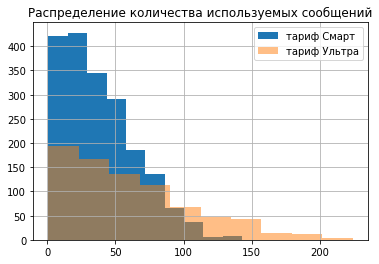

In [34]:
# строим гистограммы для количества отправленных сообщений
data_smart['messages'].hist(label='тариф Смарт') 
data_ultra['messages'].hist(alpha=0.5, label='тариф Ультра')
plt.title('Распределение количества используемых сообщений')
plt.legend()
plt.show()
    

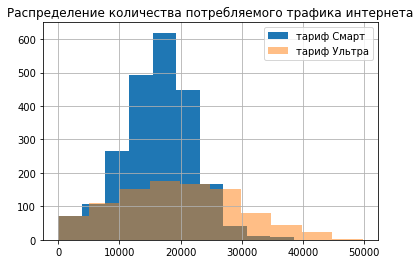

In [35]:
#строим гистограммы для потребляемого трафика интернета
data_smart['mb_used'].hist(label='тариф Смарт') 
data_ultra['mb_used'].hist(alpha=0.5, label='тариф Ультра')
plt.title('Распределение количества потребляемого трафика интернета')
plt.legend()
plt.show()

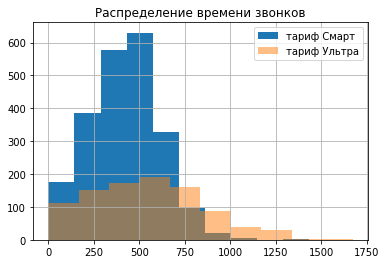

In [36]:
#строим гистограммы для времени звонокв
data_smart['time_calls'].hist(label='тариф Смарт') 
data_ultra['time_calls'].hist(alpha=0.5, label='тариф Ультра')
plt.title('Распределение времени звонков')
plt.legend()
plt.show()

### 3.1 Вывод по анализу данных

Анализируя среднее количество используемых пользователями минут, сообщений и объема трафика интернета, отмечаем, что данные показатели у пользователей тарифа ULTRA больше.

Однако анализируя стандартное отклонение и графики распределения данных показателей, видим, что разброс данных показателей у пользователей тарифа ULTRA также больше.

Стоит также отметить, что есть небольшой выброс по распределению времени звонков у пользователей тарифа SMART. Основная часть пользователей звонит не более 800 минут в месяц, однако, нашлись пользователи, которые разговаривают более 1000 минут в месяц.

## 4. Проверка гипотез

In [37]:
#просмотрим данные по выручке у пользователей тарифа ULTRA
data_ultra['revenue'].describe()


count     986.000000
mean     2070.030426
std       376.015578
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: revenue, dtype: float64

In [38]:
#просмотрим данные по выручке у пользователей SMART
data_smart['revenue'].describe()

count    2230.000000
mean     1289.641704
std       818.370799
min       550.000000
25%       550.000000
50%      1021.000000
75%      1750.000000
max      6770.000000
Name: revenue, dtype: float64

### Проверяем гипотезу "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются".

Для проверки используем t-тест, так как совокупности не зависят друг от друга, размеры выборок достаточно большие.

H0 Нулевая гипотеза:Между средним значением выручки пользователей тарифа "Ультра" и средним значением выручки пользователей тарифа "Смарт" нет существенной разницы

H1 Альтернативная гипотеза:  Существует значительная разница между средним значением выручки пользователей тарифов "Ультра" и "Смарт"


In [39]:
alpha = .01 # задаём критический уровень статистической значимости

results =  st.ttest_ind(
    data_ultra['revenue'], 
    data_smart['revenue'], equal_var=False) #проверяем гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue) # выводим на экран получившеся p-значение)

if results.pvalue < alpha:# сравниваем получившееся p-значение с заданным уровнем статистической значимости:
    print("Отвергаем нулевую гипотезу, средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.927011394420941e-250
Отвергаем нулевую гипотезу, средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются


### Проверяем гипотезу "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов."

H0 Нулевая гипотеза:Между средним значением выручки пользователей из города Москва и средним значением выручки пользователей из других городов нет существенной разницы

H1 Альтернативная гипотеза:  Существует значительная разница между средним значением выручки пользователей из города Москвы и других городов

In [40]:
#формируем датафрейм по данным из Москвы
data_moscow=data.loc[data['city']=='Москва']

In [41]:
#формируем данные из других городов
data_no_moscow=data.loc[data['city']!='Москва']

In [42]:
alpha = .01 # задаём критический уровень статистической значимости

results =  st.ttest_ind(
    data_moscow['revenue'], 
    data_no_moscow['revenue'], equal_var=False) #проверяем гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue) # выводим на экран получившеся p-значение)

if results.pvalue < alpha:# сравниваем получившееся p-значение с заданным уровнем статистической значимости:
    print("Отвергаем нулевую гипотезу, средняя выручка пользователей Москвы отличается от выручки пользователей из других регионов")
else:
    print("Не получилось отвергнуть нулевую гипотезу о том, что средняя выручка пользователей Москвы отличается от выручки пользователей из других регионов")

p-значение: 0.5216952110000279
Не получилось отвергнуть нулевую гипотезу о том, что средняя выручка пользователей Москвы отличается от выручки пользователей из других регионов


###  Вывод по проверке гипотез

Проверяя t-testом гипотезы о средней выручке пользователей выявлено:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

- гипотезу о том, что средняя выручка пользователей из города Москвы отличается от выручки пользователей из других городов не отвергаем


## Общий вывод

В рамках работы были проанализированы данные 500 пользователей «Мегалайна» за 2018 год. 

Все данные были соединены в единую таблицу. В ходе обработки данных были произведены следующие расчеты:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячная выручка с каждого пользователя.

Анализируя среднее количество используемых пользователями минут, сообщений и объема трафика интернета, отмечаем, что пользователи тарифа ULTRA больше пользуются услугами. Однако распределение данных показателей у пользователей тарифа ULTRA также больше. 

Анализируя среднемесячные показания по выручке у пользователей тарифа ULTRA и тарифа SMART, были сделаны следующие выводы:
1. Количество пользователей SMART больше - тариф более популярный
2. Среднее значение выручки в месяц от каждого пользователя у пользователя ULTRA больше. Тариф ULTRA больше приносит выручки от каждого человека.
3. Говорить о том, что выручка пользователей из Москвы больше или меньше, чем у пользователей из других городов, - нельзя.



